<a href="https://colab.research.google.com/github/joezerr/Project/blob/main/harris_corner_detection_%7C_assignment_4_%7C_2440057672.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Learning experience:*
Harris corner detection is considered to be more accurate than moravec corner detector in distinguishing edges, corners, or flats. This algorithms works by taking the differential of the corner into consideration with reference to direction directly. If the response function (R) is small, which happens when the eigen values 1&2 are small, the region is flat. If R < 0, or eigenvalue1 > eigenvalue2 or vice versa, the region is flat. Else if the R is large (R > 0), which happens when the eigen values 1&2 are large, the region is a corner.


reference:
- https://www.geekering.com/programming-languages/python/brunorsilva/harris-corner-detector-python/ 
- https://www.pluck.co.uk/wp-content/uploads/2021/10/Pluck-Dulwich-Village-HP-1600x1067.jpg
- https://medium.com/data-breach/introduction-to-harris-corner-detector-32a88850b3f6

IMPORT LIBRARIES

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow #used to show image since cv2.imshow isnt applicable in google colab
from skimage import io #used to import image from the internet

In [ ]:
source = 'https://www.pluck.co.uk/wp-content/uploads/2021/10/Pluck-Dulwich-Village-HP-1600x1067.jpg' #ill be using kitchen image. The next step is to make it grayscale
image = io.imread(source) 

In [ ]:
#make it grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

window_size=5
k=0.04
threshold=0.30

#apply gaussian filter
img_gaussian = cv2.GaussianBlur(gray,(3,3),0)

In [ ]:
height = image.shape[0]   #shape[0] represents the image height
width = image.shape[1]    #shape[1] represents the image height 
matrix_R = np.zeros((height,width))

In [ ]:
#calculate the first image derivatives using sobel
dx = cv2.Sobel(img_gaussian, cv2.CV_64F, 1, 0, ksize=3)
dy = cv2.Sobel(img_gaussian, cv2.CV_64F, 0, 1, ksize=3)

In [ ]:
#calculate the previous values to get the second derivatives and multipy them
dx2=np.square(dx)
dy2=np.square(dy)
dxy=dx*dy

offset = int( window_size / 2 )

In [ ]:
#calculate sum of  the second derivatives for each pixel, make a 1 pixel sift in the images
for y in range(offset, height-offset):
     for x in range(offset, width-offset):
        Sx2 = np.sum(dx2[y-offset:y+1+offset, x-offset:x+1+offset])
        Sy2 = np.sum(dy2[y-offset:y+1+offset, x-offset:x+1+offset])
        Sxy = np.sum(dxy[y-offset:y+1+offset, x-offset:x+1+offset])

        #define the matrix
        H = np.array([[Sx2,Sxy],[Sxy,Sy2]])

        #calculate response function
        det=np.linalg.det(H)
        tr=np.matrix.trace(H)
        R=det-k*(tr**2)
        matrix_R[y-offset, x-offset]=R

In [ ]:
#threshold applied
cv2.normalize(matrix_R, matrix_R, 0, 1, cv2.NORM_MINMAX)
for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            value=matrix_R[y, x]
            if value>threshold:
                #append the corner
                cv2.circle(image,(x,y),3,(0,255,0))

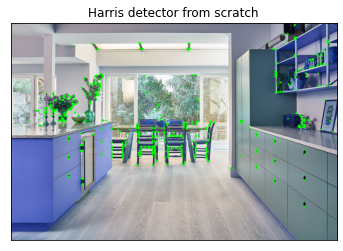

In [ ]:
#plot
plt.figure("Harris detector from scratch")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Harris detector from scratch")
plt.xticks([]), plt.yticks([])
plt.show()